# LDA Technique on AirBnB London

### Step 1: Loading Data and Libraries

> Import the data for **London** and the necessary libraries.

In [ ]:
###---install spacy
#pip install -U spacy

In [16]:
###---link to download the wheel file: https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud
#!pip install wordcloud -version-compatible-operatingsystem

In [12]:
###--- install pyLDAvis
#pip install pyldavis

In [ ]:
###when getting inconsistency run:
#conda install anaconda 
#in Anaconda Prompt and redownload the package

In [1]:
##install and/or import the necessary libraries
import pandas as pd
import os #to interact with the underlying operating system
import nltk #various text processing libraries with a lot of test datasets
import re #special text string used for describing a search pattern
import spacy #for NLP such as tokenization, named entity recognition with pre-trained models for several languages
import wordcloud #a visual representation of text data
import pprint #prints Python data structures in a form which can be used as input to the interpreter
import pyLDAvis #for interactive topic model visualization
import gensim #for representing documents as semantic vectors
import pickle #serializing and deserializing a Python object structure

C:\Users\chris\anaconda3\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


In [2]:
#load the data 
X = pd.read_csv("C:/Users/chris/Desktop/reviews.csv")

> The goal of this analysis is to perform **topic modeling**, let’s focus only on the `comments` from the listings

In [3]:
#drop columns that are unnecessary for our analysis
df = X.drop(columns=['listing_id', 'id', 'reviewer_id', 'reviewer_name', 'date'], axis=1)

### Step 2: Data Cleaning

> **Remove punctuation** and **lower casing** to make them reliable for analysis. First we remove all the punctuation and then lowercase the text.

In [5]:
# Remove punctuation
df['comments_processed'] = df['comments'].apply(lambda x: re.sub('[,\.!?]', '', str(x)))
df['comments_processed'] = df['comments'].map(lambda x: re.sub('brbr', #Removes the 'brbr' left from removing characters
                                                             ' ',
                                                             re.sub('[^a-zA-Z ]', #Removes anything that is 'non-letter' or 'space'
                                                                    '',           #Replace with nothing
                                                                    str(x))))    #string element to be replaced
# Lower case letters
df['comments_processed'] = df['comments_processed'].map(lambda x: x.lower())

# Drop words with length of string 2 or less
def remove_stopwords(string):
    """
    Removes stopwords that do not provide any meaning to sentiment analysis, i.e. words with length 2 or less.
    """
    words = []
    for el in string.split(' '):
        if len(el) > 2:
            words.append(el)
    out = ''
    for el in words:
        out= out + ' ' + el
    return out

# Apply the function above to the already processed comments to have only meaningful text for the algorithm
df['comments_processed']= df['comments_processed'].apply(lambda x: remove_stopwords(x))

<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
C:\Users\chris\AppData\Local\Temp/ipykernel_12012/1571883955.py:2: DeprecationWarning: invalid escape sequence \.
  df['comments_processed'] = df['comments'].apply(lambda x: re.sub('[,\.!?]', '', str(x)))


### Step 3: Exploratory Analysis

> We use *wordcloud* to get a visual representation of the **most common words** used in reviews for London AirBnB listings.

<div class="alert alert-block alert-danger">
<b>IMPORTANT:</b> Remove the <i>[0:1000]</i> below once you're finished with the whole project!
</div>

C:\Users\federico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


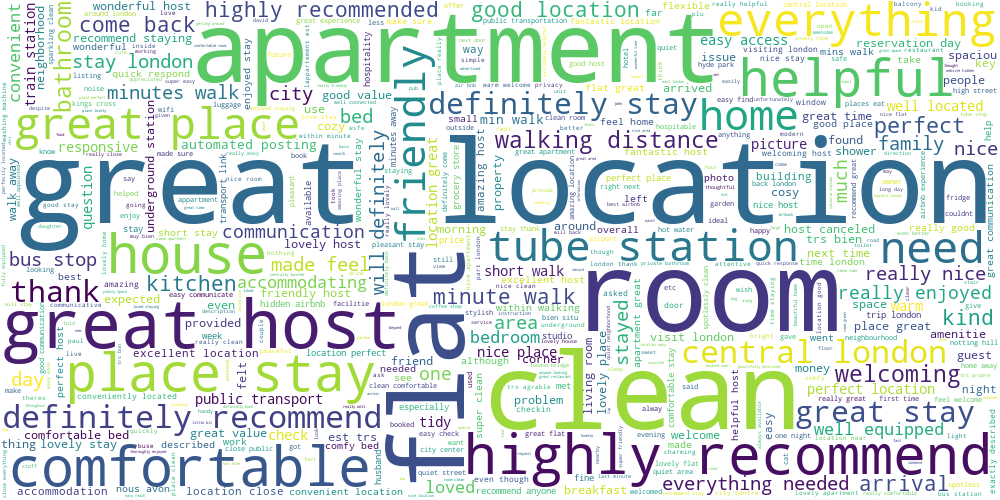

In [11]:
from wordcloud import WordCloud

# Join the different processed comments together in one long string
long_string = ','.join(list(df['comments_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue', 
                      width=1000, height=500)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### Step 4: Text Preparation for LDA Analysis

> Transform above text into a format that will serve as input for training LDA model:
    > - Tokenize text
    > - Remove stopwords

In [13]:
# Remove the non-english words to avoid conflicting languages in keywords of topics
#nltk.download('words') -> run it again as it changes or increases from time to time
import nltk

# Gets the unique values from nltk corpus words package downloaded
words = set(nltk.corpus.words.words()) #gets the unique values from nltk corpus words package downloaded

# Removes the non-english words (wasn't working perfectly...)
df['comments_processed'] = df['comments_processed'].map(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) \
         if w.lower() in words or not w.isalpha())) #removes the non-english words

C:\Users\federico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Remove stopwords downloaded from nltk
from gensim.utils import simple_preprocess
nltk.download('stopwords')
from nltk.corpus import stopwords

# Choose stopwords to be in english
stop_words = stopwords.words('english')

# If any of the stopwords that are seen in the world cloud are not in the stop_words, please define them
stop_words.extend(['from', 'will', 'make', 'made', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = df['comments_processed'].values.tolist()
data_words = list(sent_to_words(data))

# Remove stop words
data_words = remove_stopwords(data_words)

C:\Users\federico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\federico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# MAKE BIGRAMS AND TRIGRAMS

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

data_words=[trigram_mod[bigram_mod[doc]] for doc in data_words]

C:\Users\federico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
import gensim.corpora as corpora

# Create dictionary of data_words converted above
id2word = corpora.Dictionary(data_words)

# Create corpus of data_words
texts = data_words

# Term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View the corpus
print(corpus[:1][0][:30])

C:\Users\federico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 2)]


### Step 5: LDA Model Training

> We input the **number of topics** we want, where each topic is a combination of keywords, and each keyword contributes a certain weight to the topic.

In [25]:
from pprint import pprint

# Number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Pretty print the keyword for the number of topics chosen
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\federico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Step 6: Analyzing our LDA Model

> We *visualize* the topics for interpretability. 
    > 1. Better understanding and interpreting **individual topics**, and
    > 2. Better understanding the relationships **between the topics**.

In [26]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

LDAvis_prepared

C:\Users\federico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\federico\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.060146 -0.127983       1        1  12.790081
14     0.074607 -0.056458       2        1   8.490541
6     -0.044761 -0.023742       3        1   7.953192
7     -0.012462  0.038247       4        1   7.254316
18    -0.026048 -0.066404       5        1   6.419855
19    -0.036927  0.070954       6        1   5.863142
13     0.048701 -0.102852       7        1   5.813109
0     -0.091558  0.036859       8        1   5.740259
11    -0.071290  0.001460       9        1   5.287496
16    -0.019586 -0.011877      10        1   5.160937
9     -0.037695  0.008987      11        1   4.248247
1     -0.034750  0.000650      12        1   4.148328
3     -0.053515  0.036301      13        1   3.776817
15    -0.134584  0.153834      14        1   3.655230
5     -0.047286 -0.027128      15        1   3.469817
12    -0.013240 -0.058448      16        1   3.211934
17     0.025136 -0.044383      17        1   2.458107
2      0.254141  0.163106      18        1   1.743102
8      0.052762 -0.002224      19        1   1.369791
10     0.108209  0.011101      20        1   1.145698, topic_info=          Term           Freq          Total Category  logprob  loglift
95    location  323189.000000  323189.000000  Default  30.0000  30.0000
38        stay  444675.000000  444675.000000  Default  29.0000  29.0000
53        host  249501.000000  249501.000000  Default  28.0000  28.0000
76       would  206065.000000  206065.000000  Default  27.0000  27.0000
56   recommend  184742.000000  184742.000000  Default  26.0000  26.0000
..         ...            ...            ...      ...      ...      ...
194     little     911.673813   53641.548746  Topic20  -5.2502   0.3944
234    helpful     971.611140  103122.934280  Topic20  -5.1866  -0.1956
59      around     872.836434   58154.318532  Topic20  -5.2938   0.2700
0         also     867.901619  104840.281625  Topic20  -5.2994  -0.3250
76       would     837.456896  206065.102136  Topic20  -5.3352  -1.0364

[1829 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
9491      4  0.976073       able_bodied
7153     10  0.013184  absolute_bargain
7153     11  0.975647  absolute_bargain
305      10  0.024285    absolute_dream
305      16  0.930938    absolute_dream
...     ...       ...               ...
588      17  0.019856               yet
588      18  0.003459               yet
588      19  0.010504               yet
588      20  0.013451               yet
7658     10  0.987684              zoom

[11548 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 15, 7, 8, 19, 20, 14, 1, 12, 17, 10, 2, 4, 16, 6, 13, 18, 3, 9, 11])

In [33]:
# Save model visualization (could be perfect for Presentation!)

pyLDAvis.save_html(LDAvis_prepared, 'C:/Users/chris/Desktop/LDA Model '+ str(num_topics) +'.html')

C:\Users\federico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# Extract topic list
x = lda_model.show_topics(num_words=30,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

c = 0
topics={}


for topic,words in topics_words:
    topics[topic] = words
topics= pd.DataFrame(data=topics)

# Save the topics list

topics.to_csv("C:/Users/chris/Desktop/topics_extended_stopwords.csv")

4::['stay', 'location', 'one', 'would', 'night', 'bit', 'get', 'also', 'didnt', 'small', 'street', 'two', 'clean', 'could', 'noise', 'kitchen', 'check', 'time', 'door', 'host', 'bed', 'overall', 'bathroom', 'well', 'even', 'however', 'station', 'little', 'day', 'people']
14::['walk', 'station', 'walking', 'min', 'tube', 'also', 'distance', 'stay', 'bus', 'city', 'away', 'train', 'within', 'like', 'well', 'clean', 'location', 'get', 'minute', 'even', 'center', 'close', 'host', 'short', 'around', 'recommend', 'comfortable', 'really', 'underground', 'need']
11::['would', 'stay', 'recommend', 'definitely', 'location', 'clean', 'lovely', 'anyone', 'host', 'really', 'highly', 'welcoming', 'comfortable', 'area', 'looking', 'family', 'like', 'stayed', 'feel', 'bathroom', 'bed', 'need', 'fantastic', 'quiet', 'city', 'friendly', 'little', 'also', 'helpful', 'time']
9::['stay', 'transport', 'lovely', 'close', 'thanks', 'public', 'quiet', 'comfortable', 'location', 'clean', 'links', 'area', 'reall

C:\Users\federico\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
